# Putting all together


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scripts.modeling as modeling
import scripts.spotify_api as spotify_api


# Apply the default theme
sns.set_theme()

In [2]:
# Get playlist metadata and tracklist


# import track data
df = pd.read_csv("./data/playlist_tracks.csv")
playlist_data = pd.read_csv("./data/playlists.csv")

# merging the playlist info
df = df.merge(playlist_data, on="playlist_url")
df.head()

,preview_url,available_markets,explicit,type,episode,track,album,artists,disc_number,track_number,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name
0,https://p.scdn.co/mp3-preview/5f331286613eba71...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-5.894,0,0.0402,0.0459,0.852,0.0691,0.960,123.009,4,Lofi House
1,https://p.scdn.co/mp3-preview/b0eb532193111646...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-7.892,0,0.0707,0.0405,0.916,0.1020,0.646,117.018,4,Lofi House
2,https://p.scdn.co/mp3-preview/2ec7f3fa967937a1...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-7.570,0,0.0462,0.0237,0.731,0.5930,0.641,121.993,4,Lofi House
3,https://p.scdn.co/mp3-preview/2184855d4a8ff5fa...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-15.531,1,0.0282,0.3210,0.954,0.0822,0.171,132.986,4,Lofi House
4,https://p.scdn.co/mp3-preview/ddbaa2baf5d69d28...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-9.515,1,0.0472,0.1400,0.867,0.1460,0.418,126.027,4,Lofi House


In [3]:
# build and train model
model, label_encoder, scaler, history, class_report = modeling.build_train(
    df, epochs=20, hidden_sizes=[8, 16, 8], lr=0.01
)

Training Start
Epoch:1 / 20, train loss:0.9373 train_acc:0.5739, valid loss:0.3814 valid acc:0.90805
Epoch:2 / 20, train loss:0.3393 train_acc:0.8920, valid loss:0.3029 valid acc:0.93103
Epoch:3 / 20, train loss:0.2236 train_acc:0.9318, valid loss:0.3124 valid acc:0.93103
Epoch:4 / 20, train loss:0.2082 train_acc:0.9403, valid loss:0.2871 valid acc:0.94253
Epoch:5 / 20, train loss:0.1825 train_acc:0.9347, valid loss:0.3311 valid acc:0.93103
Epoch:6 / 20, train loss:0.1965 train_acc:0.9318, valid loss:0.1976 valid acc:0.95402
Epoch:7 / 20, train loss:0.1449 train_acc:0.9574, valid loss:0.2533 valid acc:0.95402
Epoch:8 / 20, train loss:0.1416 train_acc:0.9375, valid loss:0.2802 valid acc:0.95402
Epoch:9 / 20, train loss:0.0991 train_acc:0.9659, valid loss:0.3201 valid acc:0.93103
Epoch:10 / 20, train loss:0.0930 train_acc:0.9744, valid loss:0.3569 valid acc:0.94253
Epoch:11 / 20, train loss:0.1332 train_acc:0.9545, valid loss:0.3103 valid acc:0.94253
Epoch:12 / 20, train loss:0.1043 trai

(<Figure size 1500x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}>,
        <Axes: title={'center': 'Accuracy'}>], dtype=object))

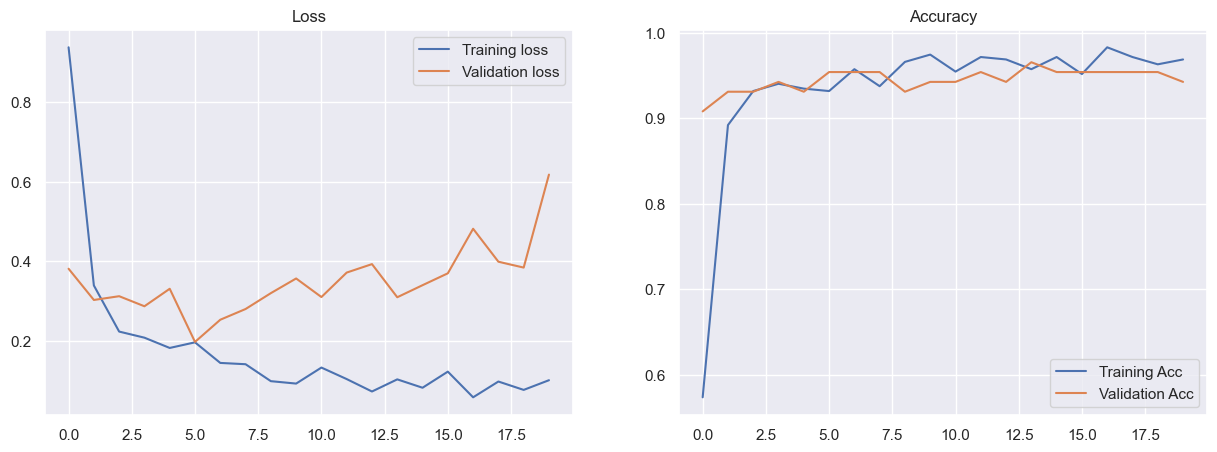

In [4]:
# plot training history
modeling.plot_training_history(history)

In [5]:
# get new tracks
track_id = ["4tekXLedu6wxNhHkKjFkPE", "1AfcE4lyIX7oDCHCPaKPg6"]

# get tracks meta
track_meta = spotify_api.get_tracks_metadata(track_id)

# hit spotify API
af = spotify_api.get_audio_features(track_id)
# merge metadata and audio features
track_df = pd.merge(track_meta, af, on="id")
# extract artist name for easier reading
track_df["artist"] = track_df["artists"].apply(lambda x: x[0]["name"])

track_df

,id,name,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist
0,4tekXLedu6wxNhHkKjFkPE,Let's Vibe,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,193663,False,{'isrc': 'FXQ892400160'},{'spotify': 'https://open.spotify.com/track/4t...,...,-4.577,0,0.0783,0.246,0.000,0.2560,0.6380,110.009,4,FRENCHGRL
1,1AfcE4lyIX7oDCHCPaKPg6,Stumble,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,121989,False,{'isrc': 'FXQ892300291'},{'spotify': 'https://open.spotify.com/track/1A...,...,-14.679,0,0.0417,0.858,0.811,0.0861,0.0991,117.003,4,Majeur Mineur


In [6]:
# running inference
inference_df = modeling.model_inference(
    track_df, model=model, scaler=scaler, label_encoder=label_encoder
)
inference_df

,id,name,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist,predicted_label,predicted_probability,all_probabilities
0,4tekXLedu6wxNhHkKjFkPE,Let's Vibe,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,193663,False,{'isrc': 'FXQ892400160'},{'spotify': 'https://open.spotify.com/track/4t...,...,0.246,0.000,0.2560,0.6380,110.009,4,FRENCHGRL,West Coast Classics,0.935841,"{' Summer Jazz': 0.00011373240704415366, 'Lofi..."
1,1AfcE4lyIX7oDCHCPaKPg6,Stumble,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,121989,False,{'isrc': 'FXQ892300291'},{'spotify': 'https://open.spotify.com/track/1A...,...,0.858,0.811,0.0861,0.0991,117.003,4,Majeur Mineur,Summer Jazz,1.000000,"{' Summer Jazz': 1.0, 'Lofi House': 2.15801243..."


In [7]:
inference_df.columns

Index(['id', 'name', 'album', 'artists', 'available_markets', 'disc_number',
       'duration_ms', 'explicit', 'external_ids', 'external_urls', 'is_local',
       'popularity', 'preview_url', 'track_number', 'type', 'uri', 'index',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'artist', 'predicted_label', 'predicted_probability',
       'all_probabilities'],
      dtype='object')

In [8]:
# printing the results
inference_df[["name", "artist", "predicted_label", "predicted_probability"]]

,name,artist,predicted_label,predicted_probability
0,Let's Vibe,FRENCHGRL,West Coast Classics,0.935841
1,Stumble,Majeur Mineur,Summer Jazz,1.000000


In [10]:
# include in playlist?
playlist_name = "West Coast Classics"
modeling.include_tracks_to_playlist(
    track_df,
    model=model,
    scaler=scaler,
    label_encoder=label_encoder,
    target_playlist_name=playlist_name,
    probability_threshold=0.7,
)

,id,name,artist,all_probabilities,target_playlist_name,target_playlist_probability,include_in_playlist
0,4tekXLedu6wxNhHkKjFkPE,Let's Vibe,FRENCHGRL,"{' Summer Jazz': 0.00011373240704415366, 'Lofi...",West Coast Classics,9.358408e-01,True
1,1AfcE4lyIX7oDCHCPaKPg6,Stumble,Majeur Mineur,"{' Summer Jazz': 1.0, 'Lofi House': 2.15801243...",West Coast Classics,5.919695e-17,False
